In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def propTF(uin_V_m, L_m, lambda_m, z_m):
    M = uin_V_m.size
    dx_m = L_m/M
    k_1_m = 2*np.pi/lambda_m
    
    #Frequency coordinates
    fx_1_m = np.linspace(-1/(2*dx_m), 1/(2*dx_m) - (1/L_m), M)
    
    #Transfer function
    H = np.exp(-1j * np.pi * lambda_m * z_m * (fx_1_m**2))
    H = np.fft.fftshift(H)
    Uin_V_m = np.fft.fft(np.fft.fftshift(uin_V_m))
    Uout_V_m = H * Uin_V_m
    uout_V_m = np.fft.ifftshift(np.fft.ifft(Uout_V_m))
    return uout_V_m

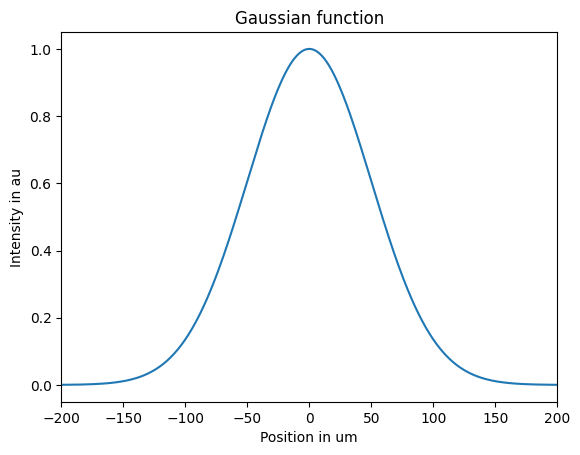

In [6]:
dx_m = 1e-6 #grid size, m:meter
Dx_m = 1 #screen size
x_m = np.linspace(-Dx_m/2, Dx_m/2, int(Dx_m/dx_m)+1)

x_mean_m = 0.0 #centered on...
x_std_m = 50e-6 #widthofgaussian
g = np.exp(-(x_m - x_mean_m)**2/(2*(x_std_m**2)))
plt.plot(x_m*1e6, g)
plt.xlabel("Position in um")
plt.ylabel("Intensity in au") #arbitrary units
plt.title("Gaussian function")
plt.xlim(-200, 200)
plt.show()

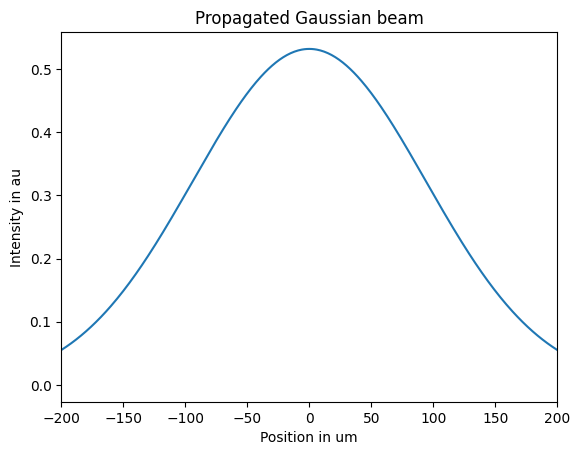

In [7]:
#initial beam electric field

wavelength_m = 500e-9 #wavelength, m
zp_m = 100e-3 #propagation distance, m

E0 = np.sqrt(g)
Ep = propTF(E0, Dx_m, wavelength_m, zp_m)

Ip = np.abs(Ep)**2

plt.plot(x_m*1e6, Ip)
plt.xlabel("Position in um")
plt.ylabel("Intensity in au") #arbitrary units
plt.title("Propagated Gaussian beam")
plt.xlim(-200, 200)
plt.show()


In [8]:
# propagate for various distances and extract the beam size 
# plot beam size vs distance — make sure it follows proper trend (2nd line below)

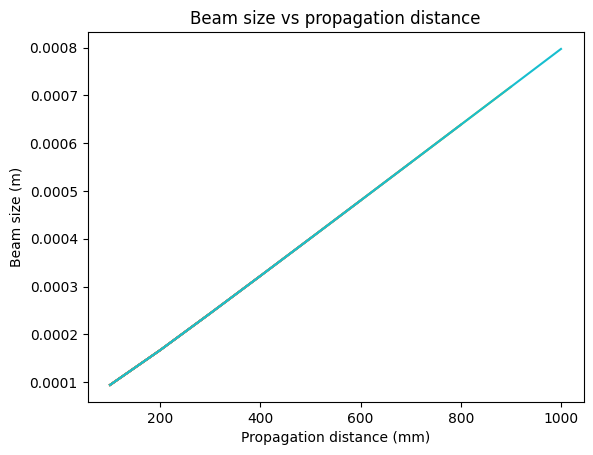

In [9]:
wavelength_m = 500e-9 #wavelength, m

dx_m = 1e-6 #grid size
Dx_m = 1 #screen size
x_m = np.linspace(-Dx_m/2, Dx_m/2, int(Dx_m/dx_m)+1)

beam_sizes_m = []
distances_m = []

for i in range(100, 1100, 100):
    zp_m = i*1e-3 #propagation distance, m

    E0 = np.sqrt(g)
    Ep = propTF(E0, Dx_m, wavelength_m, zp_m)

    Ip = np.abs(Ep)**2
    
    I_max = np.max(Ip)
    I_level = I_max / 2
    idx = np.where(Ip >= I_level)[0]
    if len(idx) > 1: # check that there are at least 2 points (not just the peak)
        x_mean = np.sum(x_m * Ip) / np.sum(Ip)
        x_std_mean = np.sqrt(np.sum((x_m - x_mean)**2 * Ip) / np.sum(Ip))
        
        beam_sizes_m.append(x_std_mean)
        distances_m.append(i)

    plt.plot(distances_m, beam_sizes_m)
    plt.title("Beam size vs propagation distance")
    plt.xlabel("Propagation distance (mm)")
    plt.ylabel("Beam size (m)")


In [10]:
# theoretical, should match above 

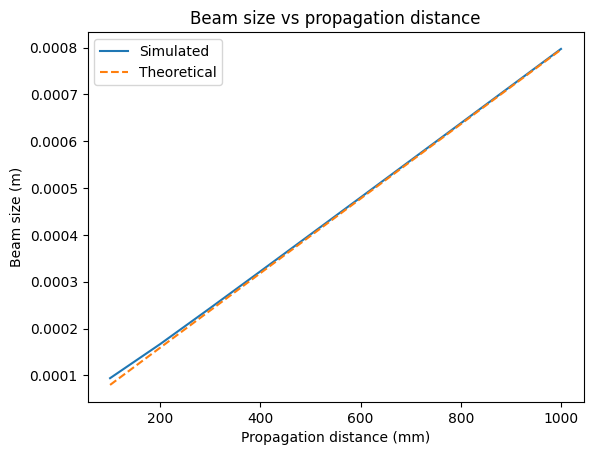

In [11]:
div_rad = wavelength_m/(4*np.pi*x_std_m) #in radians
prop_size = div_rad*zp_m #in meters

prop_sizes_m = div_rad*np.array(distances_m)*1e-3

plt.plot(distances_m, beam_sizes_m, label='Simulated')
plt.plot(distances_m, prop_sizes_m, label='Theoretical', linestyle='--')
plt.title("Beam size vs propagation distance")
plt.xlabel("Propagation distance (mm)")
plt.ylabel("Beam size (m)")
plt.legend()

In [12]:
div_rad

0.0007957747154594767

In [13]:
distances_m

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]